<a href="https://colab.research.google.com/github/Rimshan12/Generative-AI-2025/blob/main/2493_WEEK_(07)_(Assign_07).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.3780 - loss: 0.7184 - val_accuracy: 0.3701 - val_loss: 0.7208
Epoch 2/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3314 - loss: 0.7190 - val_accuracy: 0.3636 - val_loss: 0.7150
Epoch 3/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3825 - loss: 0.7164 - val_accuracy: 0.3766 - val_loss: 0.7102
Epoch 4/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3865 - loss: 0.7104 - val_accuracy: 0.4156 - val_loss: 0.7060
Epoch 5/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3985 - loss: 0.7029 - val_accuracy: 0.4610 - val_loss: 0.7024
Epoch 6/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4437 - loss: 0.7024 - val_accuracy: 0.5325 - val_loss: 0.6992
Epoch 7/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4891 - loss: 0.6965 - val_accuracy: 0.5519 - val_loss: 0.6962
Epoch 8/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5217 - loss: 0.6993 - val_accuracy: 0.5714

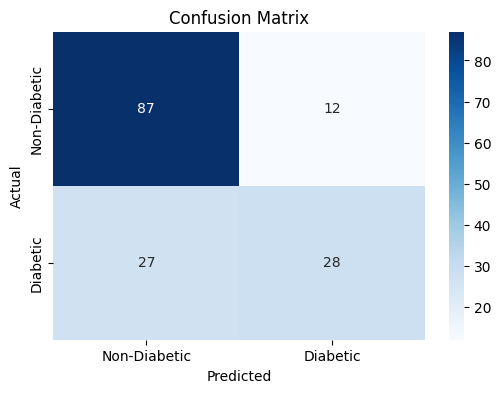

ValueError: Unable to synchronously create dataset (name already exists)

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adagrad
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("/content/Copy of diabetes(1).csv")  # Change to your dataset

# Split into features (X) and target (y)
X = data.iloc[:, :-1].values  # All columns except the last
y = data.iloc[:, -1].values   # Last column (target)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler for future use
joblib.dump(scaler, "scaler.pkl")

# Define the ANN model
model = Sequential([
    Dense(12, activation="swish", input_shape=(X_train.shape[1],)),
    Dense(25, activation="swish"),
    Dense(15, activation="swish"),
    Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adagrad(), loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=300, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Predict classes
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=["Non-Diabetic", "Diabetic"])

# Print results
print(f"Test Accuracy: {test_accuracy:.4f}")
print(report)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Diabetic", "Diabetic"],
            yticklabels=["Non-Diabetic", "Diabetic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Save the trained model
model.save("/content/diabetes_ann_model.h5")
print("Model saved successfully!")

# Load the trained model and scaler
def load_trained_model():
    return load_model("diabetes_ann_model.h5"), joblib.load("scaler.pkl")

# Predict function
def predict_diabetes(input_data):
    model, scaler = load_trained_model()
    input_array = np.array(input_data).reshape(1, -1)
    input_scaled = scaler.transform(input_array)
    prediction = model.predict(input_scaled)
    return "Diabetic" if prediction > 0.5 else "Non-Diabetic"

# Example input
sample_input = [6, 148, 72, 35, 0, 33.6, 0.627, 50]  # Replace with real data
result = predict_diabetes(sample_input)
print(f"Prediction: {result}")